In [1]:
import pandas as pd

In [2]:
# Load the two datasets
databank = pd.read_csv('bank-additional-full.csv', sep=';')
dataeco = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
# Concatenate the datasets horizontally
combined_data = pd.concat([databank, dataeco], axis=1)

In [4]:
# Save the combined dataset to a new file
combined_data.to_csv('combined_data.csv', index=False)
combined_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,5191.0,no,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,5191.0,no,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,5191.0,no,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,5191.0,no,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,5191.0,no,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
missing_values = combined_data.isnull().sum()
print(missing_values)

age               500721
job               500721
marital           500721
education         500721
default           500721
housing           500721
loan              500721
contact           500721
month             500721
day_of_week       500721
duration          500721
campaign          500721
pdays             500721
previous          500721
poutcome          500721
emp.var.rate      500721
cons.price.idx    500721
cons.conf.idx     500721
euribor3m         500721
nr.employed       500721
y                 500721
InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
dtype: int64


In [6]:
# Calculate the mode of each categorical column with missing values
categorical_cols_with_missing = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for col in categorical_cols_with_missing:
    mode_value = combined_data[col].mode()[0]
    combined_data[col].fillna(mode_value, inplace=True)

In [7]:
# Calculate the mean of each numerical column with missing values
numerical_cols_with_missing = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in numerical_cols_with_missing:
    mean_value = combined_data[col].mean()
    combined_data[col].fillna(mean_value, inplace=True)

combined_data['Description'].fillna('Unknown', inplace=True)
combined_data.dropna(subset=['CustomerID','y'], inplace=True)
missing_values = combined_data.isnull().sum

In [8]:
missing_values = combined_data.isnull().sum()
print(missing_values)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [9]:
combined_data.drop(['y'], axis=1, inplace=True)
combined_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,4.857,5191.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,4.857,5191.0,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,4.857,5191.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,4.857,5191.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,4.857,5191.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
summary_stats = combined_data.describe()
print(summary_stats)

                age      duration      campaign         pdays      previous  \
count  26239.000000  26239.000000  26239.000000  26239.000000  26239.000000   
mean      40.144746    258.459393      2.570601    974.366058      0.147490   
std       10.068763    257.161174      2.745076    154.444709      0.422571   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    103.000000      1.000000    999.000000      0.000000   
50%       38.000000    181.000000      2.000000    999.000000      0.000000   
75%       47.000000    319.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  26239.000000    26239.000000   26239.000000  26239.000000   
mean       0.134853       93.574478     -40.613377      3.681068   
std        1.531772        0.576424       4.650193      1.697557   
min       -3.400

In [11]:
categorical_cols = combined_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Column: {col}")
    print(combined_data[col].value_counts())

Column: job
job
admin.           6521
blue-collar      6277
technician       4233
services         2603
management       1799
retired          1030
entrepreneur      929
self-employed     860
housemaid         691
unemployed        625
student           464
unknown           207
Name: count, dtype: int64
Column: marital
marital
married     16237
single       6966
divorced     2978
unknown        58
Name: count, dtype: int64
Column: education
education
university.degree      7443
high.school            6041
basic.9y               4003
professional.course    3267
basic.4y               2763
basic.6y               1605
unknown                1103
illiterate               14
Name: count, dtype: int64
Column: default
default
no         20343
unknown     5894
yes            2
Name: count, dtype: int64
Column: housing
housing
yes        13650
no         11943
unknown      646
Name: count, dtype: int64
Column: loan
loan
no         21609
yes         3984
unknown      646
Name: count, dtype: int

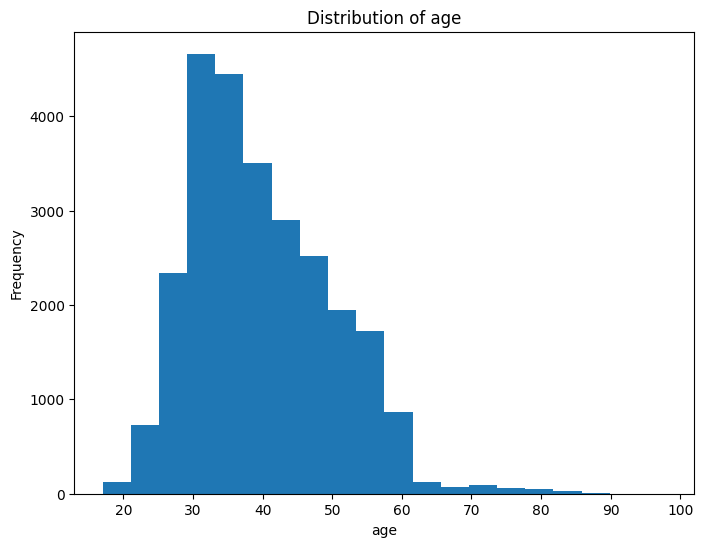

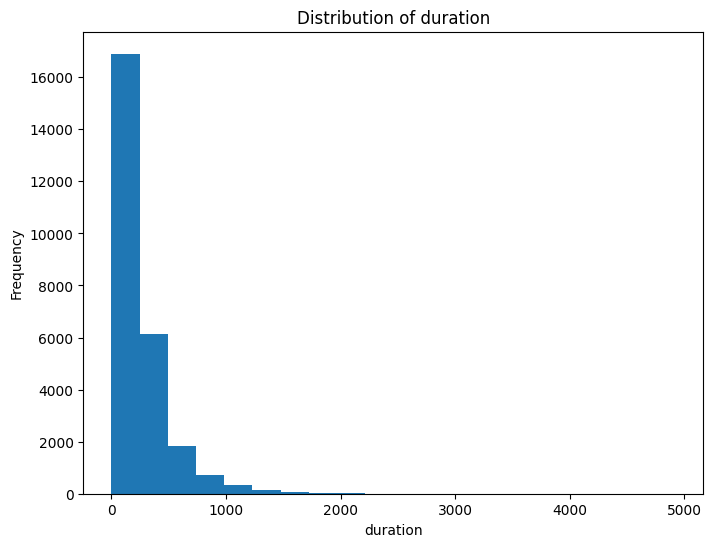

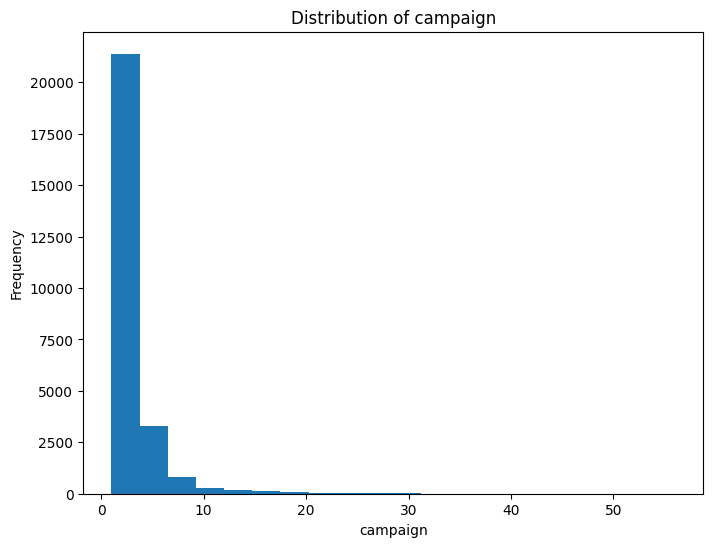

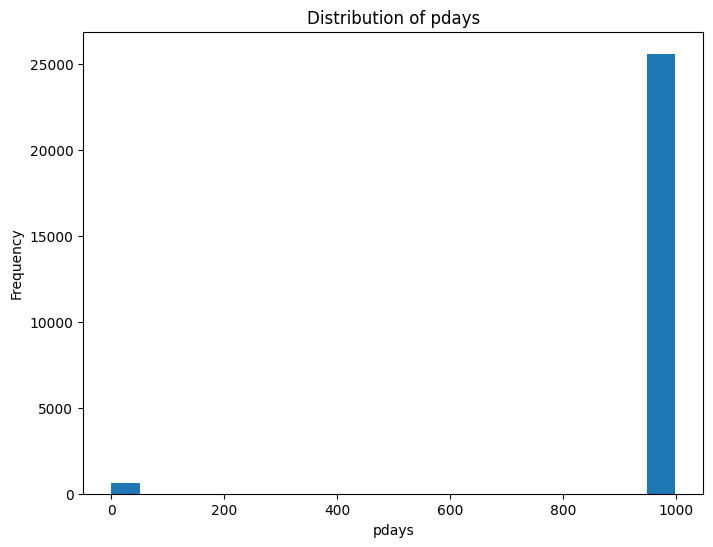

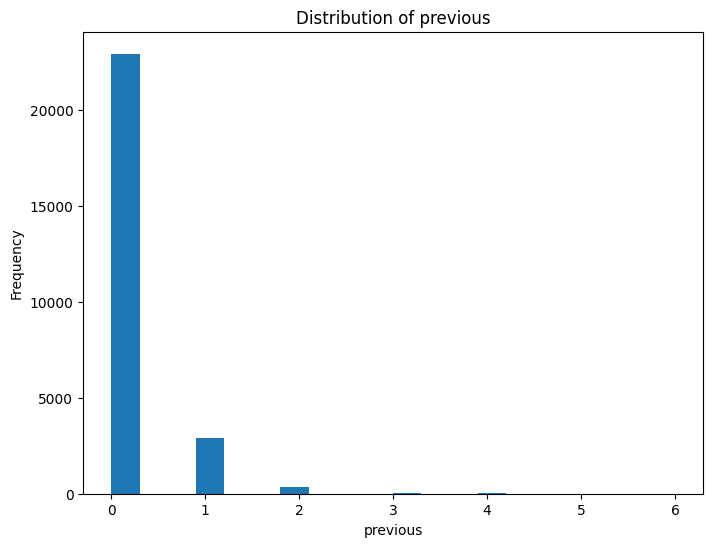

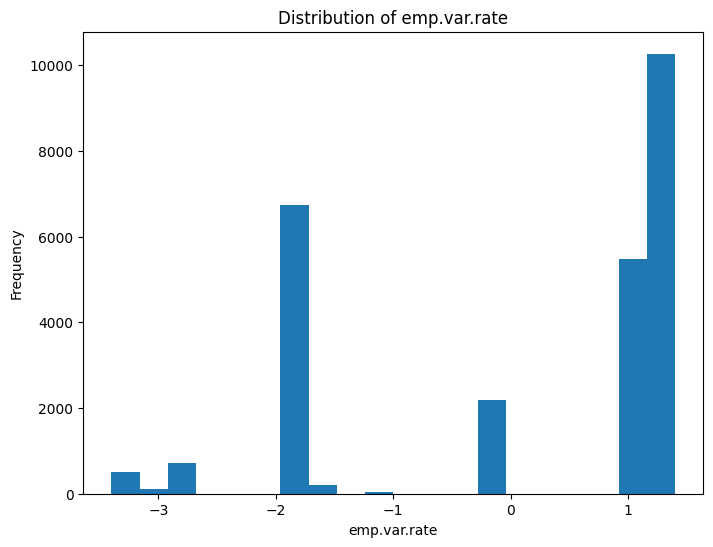

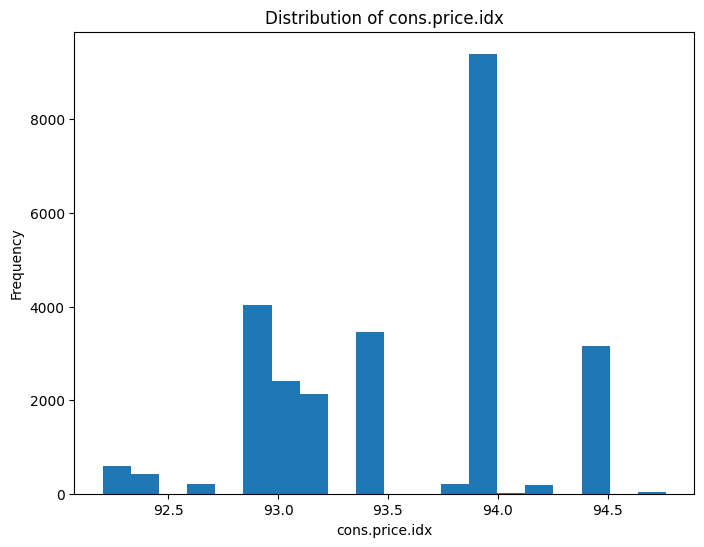

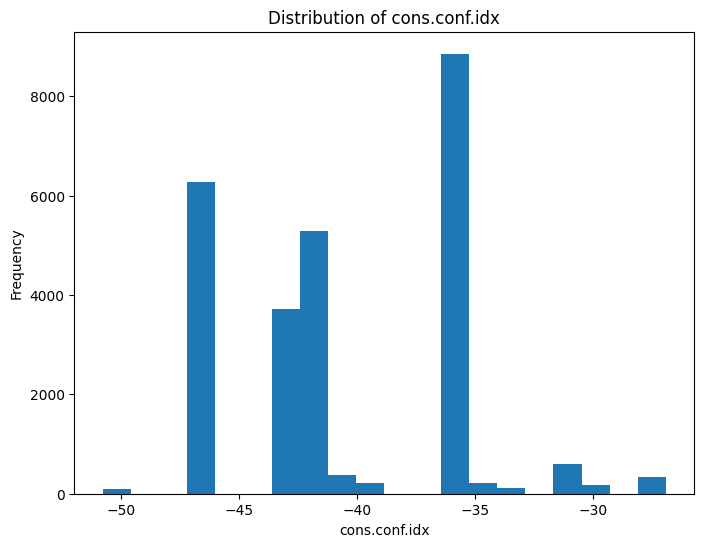

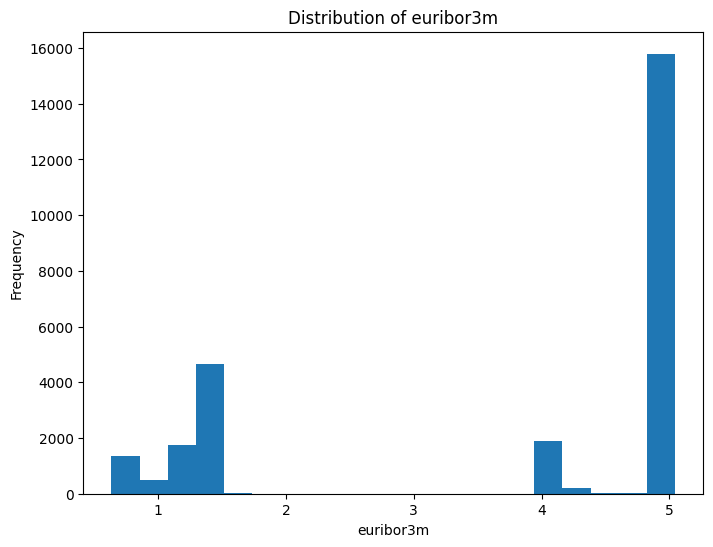

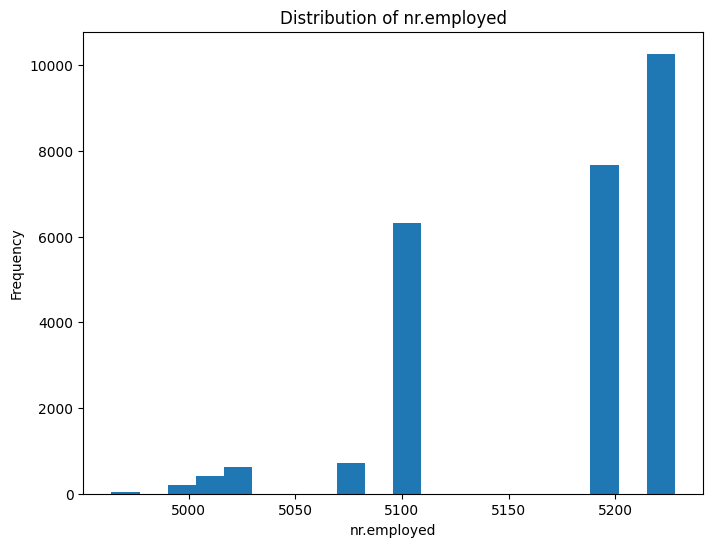

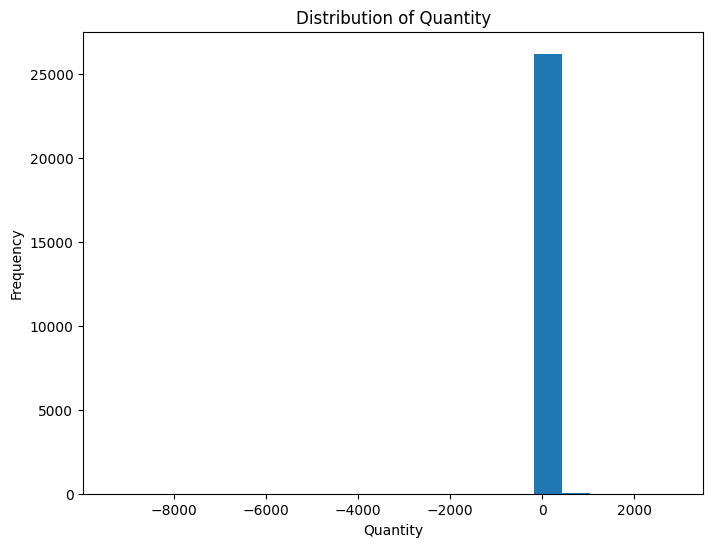

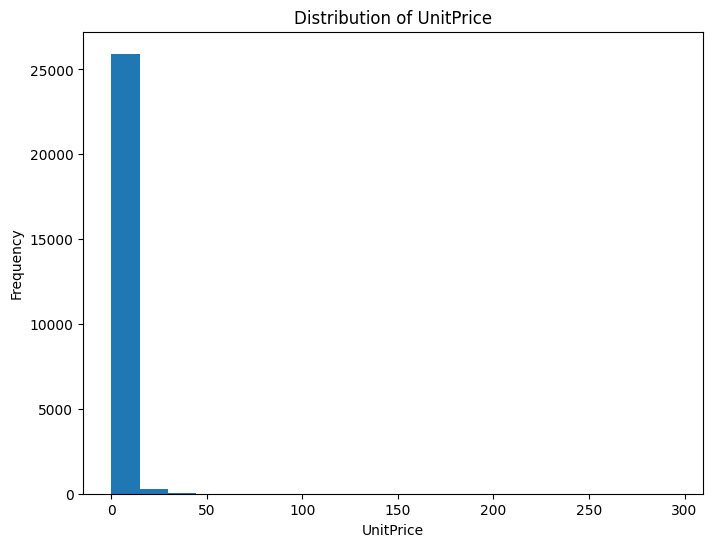

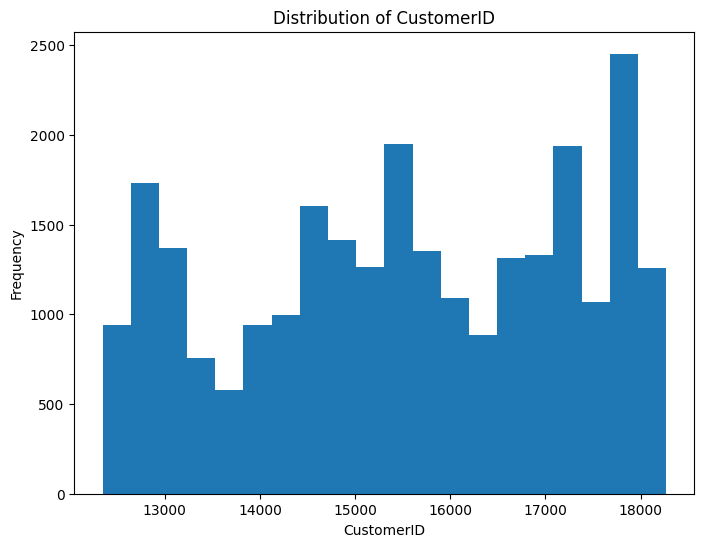

In [12]:
import matplotlib.pyplot as plt

numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(combined_data[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

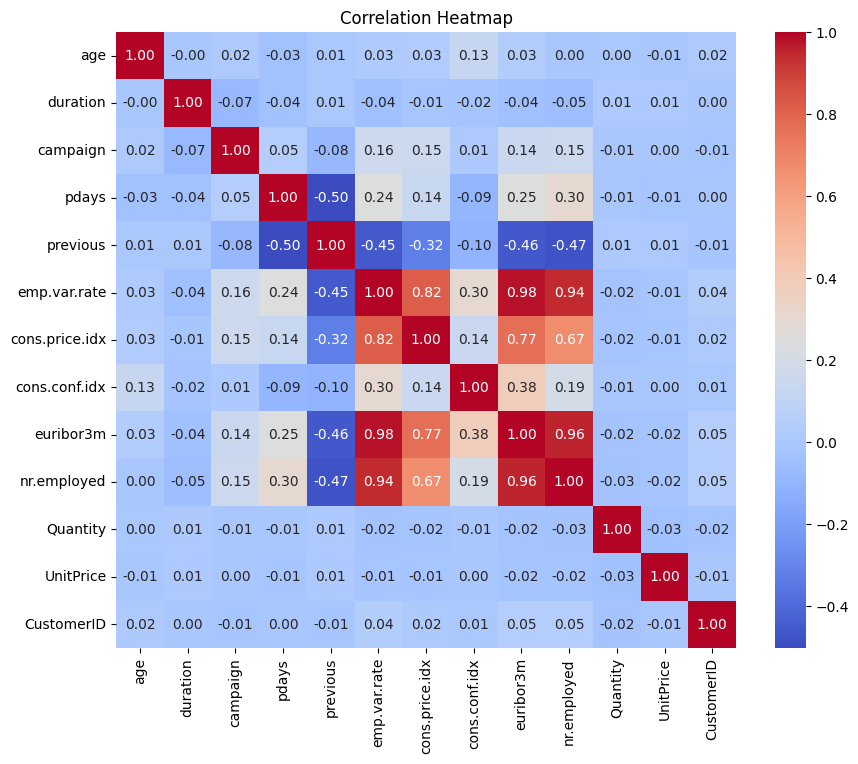

In [13]:
correlation_matrix = combined_data[numerical_cols].corr()
import seaborn as sns
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Use fmt=".2f" for two decimal places
plt.title('Correlation Heatmap')
plt.show()

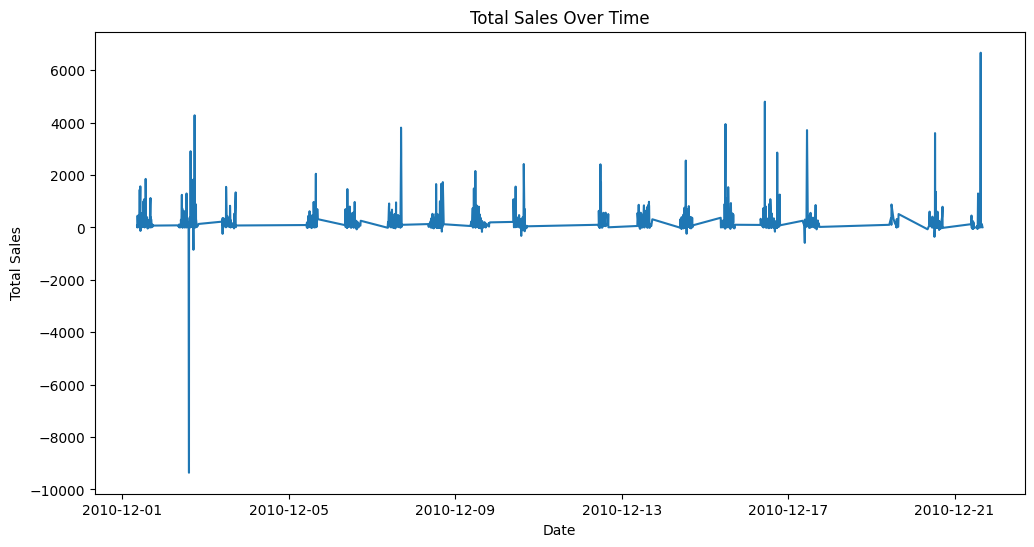

In [14]:
combined_data['InvoiceDate'] = pd.to_datetime(combined_data['InvoiceDate'])
sales_by_date = combined_data.groupby('InvoiceDate')['Quantity'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [16]:
selected_columns = ['CustomerID', 'StockCode', 'Quantity']
your_data = combined_data[selected_columns]

In [17]:
# Create a user-item interaction matrix
user_item_matrix = your_data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

In [18]:
# Identify and handle negative values in the user-item matrix
max_negative_value = -1e8
user_item_matrix = np.where(user_item_matrix < 0, max_negative_value, user_item_matrix)  # Maximize negative values

min_rating = user_item_matrix.min().min()
max_rating = user_item_matrix.max().max()
user_item_matrix = (user_item_matrix - min_rating) / (max_rating - min_rating)

In [19]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(user_item_matrix, test_size=0.2, random_state=42)
num_users, num_items = X_train.shape

embedding_dim = 64

model = keras.Sequential([
    keras.layers.Input(shape=(num_items,)),
    keras.layers.Embedding(input_dim=num_items, output_dim=embedding_dim),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_items, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')


In [20]:
# Check the shape of input data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (745, 2411)
X_test shape: (187, 2411)


In [21]:
# Fit the model to the data
model.fit(X_train, X_train, epochs=10, batch_size=32, verbose=2)

user_index = 0
user_ratings = model.predict(np.array([X_test[user_index]]))
recommended_item_indices = (-user_ratings[0]).argsort()[:5]  

Epoch 1/10
24/24 - 12s - 519ms/step - loss: 0.0801
Epoch 2/10
24/24 - 7s - 304ms/step - loss: 1.9250e-04
Epoch 3/10
24/24 - 7s - 289ms/step - loss: 1.3529e-04
Epoch 4/10
24/24 - 10s - 418ms/step - loss: 1.3529e-04
Epoch 5/10
24/24 - 10s - 431ms/step - loss: 1.3529e-04
Epoch 6/10
24/24 - 7s - 272ms/step - loss: 1.3529e-04
Epoch 7/10
24/24 - 7s - 275ms/step - loss: 1.3529e-04
Epoch 8/10
24/24 - 7s - 276ms/step - loss: 1.3529e-04
Epoch 9/10
24/24 - 7s - 277ms/step - loss: 1.3529e-04
Epoch 10/10
24/24 - 10s - 434ms/step - loss: 1.3529e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


In [22]:
# Print recommended item indices
print("Recommended items for user at index", user_index, ":")
print(recommended_item_indices)

Recommended items for user at index 0 :
[   0 1569 1570 1571 1573]
